# The Sparks Foundation (TSF) - Data Science and Business Analytics Internship

## TASK 2 - Prediction using Unsupervised Machine Learning

In this task, we will predict the optimum number of clusters using K-means clustering and represent it visually by using "Iris" dataset given by The Sparks Foundation. 

## Steps:

     - Step 1 - Importing the libraries
     - Step 2 - Importing the dataset
     - Step 3 - Preparing the data
     - Step 4 - Visualizing the clusters and their centres
     
## Task performed by: Kanishka Gour

## STEP 1 - Importing the Libraries

In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data.

In [ ]:
# Importing the all librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

## STEP 2 - Importing the Dataset

In this step, we download the data through sklearn datsets.

In [ ]:
# Load the iris dataset
from sklearn.datasets import load_iris
from sklearn import tree
iriss = load_iris()
iris_df = pd.DataFrame(iriss.data, columns=iriss.feature_names)

In [ ]:
# Print the first five rows of dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Print the last five rows of dataset
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
# Checking the shape of dataset
iris_df.shape

(150, 4)

In [ ]:
# Checking the columns of the datset 
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# Checking the info of the dataset 
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
#Print the summary of the data
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Checking the null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## STEP - 3 : Preparing the data

In [ ]:
x = iris_df.iloc[:,: ].values

# Finding the optimum number of clusters for k-means classification

ssd = [] # Within cluster sum of squares
from sklearn.cluster import KMeans
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 21)
  kmeans.fit(x)
  ssd.append(kmeans.inertia_)

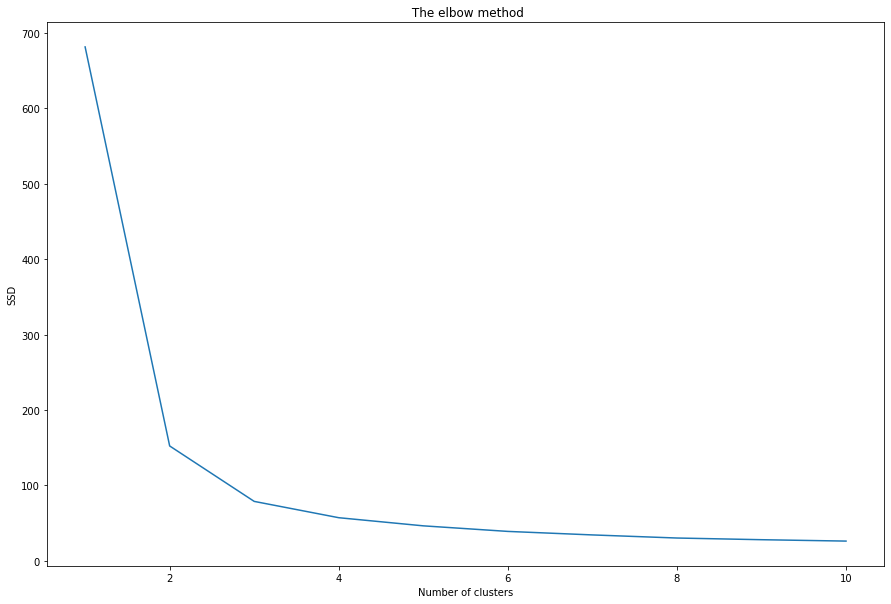

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), ssd)
plt.title(" The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("SSD")
plt.show()

#### You can clearly that why it is called 'The Elbow Method' from the above graph, the optimum clusters is where the elbow occurs. This is when the Sum of Squares (SSD) doesn't decrease significantly with every iteration. 

From this, we choose the number of clusters as 3.

In [ ]:
# Applying K-Means to the dataset / Creating the kmeans classifiers
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 21)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Step 4 - Visualizing the clusters and their centres

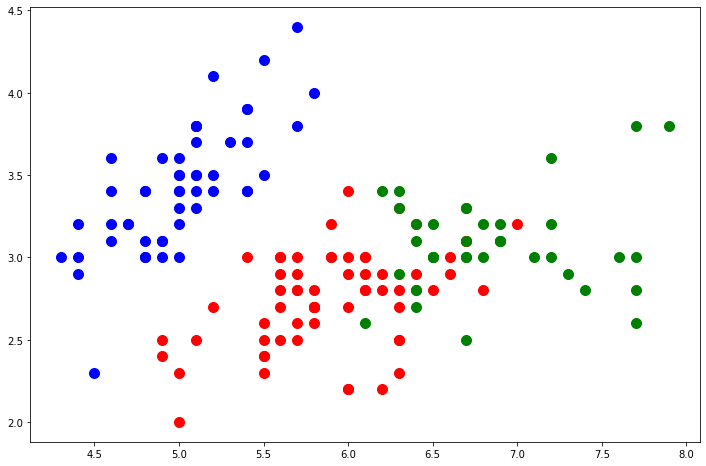

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')